<a href="https://colab.research.google.com/github/Nirban-Roy/Machine-Learning-Models/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression from Scratch**
1.   Set the learning rate and the epoch.
2.   Initiate Random weight and bias value
3. Build Linear Regression Equation (y=wx+b)
4. Continuously go on changing the value of w and b for the given number of epochs


In [16]:
import numpy as np

class Linear_Regression():

#initiating the parameters
  def __init__(self,learning_rate,no_of_iterations):
    self.learningrate=learning_rate
    self.no_of_iterations=no_of_iterations

#intializing the X values and the Y values
  def fit(self,X,Y):
    self.m,self.n=X.shape
    self.w=np.zeros(self.n) #no. of zeros = no. of features
    self.b=0 #intialising the y-intercept
    self.X=X
    self.Y=Y

    #gradient descent algorithm
    for i in range(self.no_of_iterations):
      self.updateweights()

  def updateweights(self):
    Y_pred=self.predict(self.X)
    #gradients
    dw=-(2*(self.X.T).dot(self.Y-Y_pred)/self.m)
    db=-(2*np.sum(self.Y-Y_pred))/self.m

    #updating the weights
    self.w=self.w-self.learningrate*dw
    self.b=self.b-self.learningrate*db

  def predict(self,X):
    return X.dot(self.w)+self.b #forming the equation of line Y=wX+b

**Using Linear Regression for Prediction**

linear regression line:
 y = 9517.44574259671 x + 25609.792500550488


Text(0, 0.5, 'Salary')

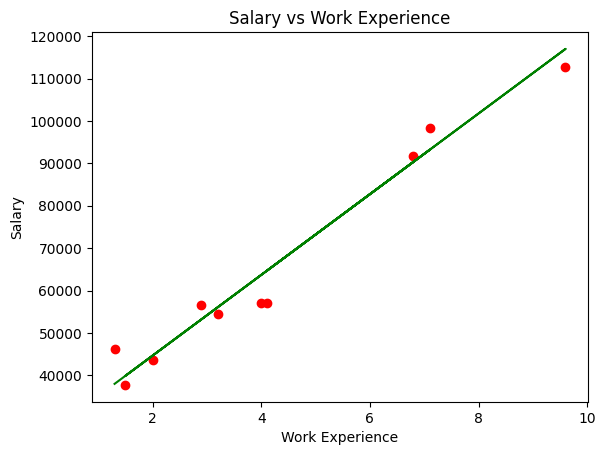

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Preprocessing
salary_data=pd.read_csv('/content/salary_data.csv')

# Splitting the feature and the target and converting to numpy library using .values
X=salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.33,random_state=10)

# Training the linear regression model
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)
model.fit(X_train,Y_train)

print('linear regression line:\n y =',model.w[0],'x +',model.b)

Y=model.predict(X_test)
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,Y,color='green')
plt.title("Salary vs Work Experience")
plt.xlabel("Work Experience")
plt.ylabel("Salary")